# Homework 1 - Numerical programming & Regression

## *Ran Ju*
Netid: rj133

Instructions for homework assignments can be found on Sakai under lessons.

# 1) Getting started with NumPy
### (1 Point)
Consider the following table of data that provides the values of a discrete data vector $\mathbf{x}$ of samples from the random variable $X$, where each entry in $\mathbf{x}$ is given as $x_i$.

*Table 1. Dataset N=5 observations*

|        | $x_0$ | $x_1$ | $x_2$ | $x_3$ | $x_4$ |
|------  |-------|-------|-------|-------|-------|
|$\textbf{x}$| 2     | 3     | 10    | -1    | -1    |

Use NumPy to compute the (a) mean, (b) variance, and (c) median of the data. 

*Your answer should include the definition of mean, median, and variance in the context of discrete data.*

**ANSWER**

If there is a dataset of $X: x_1, x_2 ,… , x_n$

a) mean = $\frac{1}{n}\sum_{i=1}^{n} {x_i}$

b) variance = $\frac{1}{n}\sum_{i=1}^{n} {(x_i-mean)^2}$

c) if an array of number is listed in order from smallest to greatest,

when there is an odd number of numbers, the median is the middle number; 

when there is an even number of numbers, the median is the mean of two middle numbers.

In [1]:
#imprt the library and set the array of data
import numpy as np
data=[2,3,10,-1,-1]

#calculate mean variance and median use numpy
mean=np.mean(data)
variance=np.var(data)
median=np.median(data)

print('The mean of the data is '+str(mean))
print('The variance of the data is '+str(variance))
print('The median of the data is '+str(median))

The mean of the data is 2.6
The variance of the data is 16.240000000000002
The median of the data is 2.0


# 2) Some basic numerical programming
### (2 points total)

1. Synthesize $n=10^4$ normally distributed data points with mean $\mu=2$ and a standard deviation of $\sigma=1$. Call the vector of observations that you generate, $\textbf{x}$. (*0.5 points*)
2. Calculate the mean and standard deviation of $\textbf{x}$ to validate (1) and provide the result to a precision of four significant figures. (*0.5 points*)
3. Plot a histogram of the data in $\textbf{x}$ with 30 bins (*0.5 points*)
4. What is the 90th percentile of $\textbf{x}$? The 90th percentile is the value below which 90% of observations can be found. (*0.5 points*)

**ANSWER**

In [2]:
#1. Synthesize data points
x=np.random.normal(2,1,10000)

In [3]:
#2. Calculate mean and standard deviation
mean=float('{0:.3f}'.format(np.mean(x)))
std=float('{0:.3f}'.format(np.std(x)))
print('The mean is '+str(mean))
print('The error of mean is '+'{0:.3f}'.format(abs((mean-2)/2)))
print('The standard deviation is '+'{0:.3f}'.format(std))
print('The error of standard deviation is '+'{0:.3f}'.format(abs((std-1)/1)))

The mean is 2.0
The error of mean is 0.000
The standard deviation is 0.990
The error of standard deviation is 0.010


Text(0, 0.5, 'show times y')

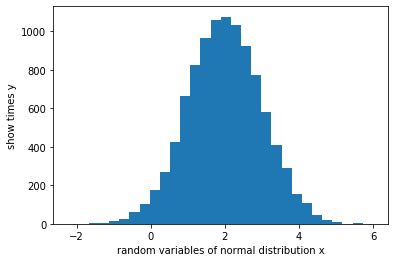

In [4]:
#3. Plot the data
from matplotlib import pyplot as plt
%matplotlib inline
%config lnlineBackend.figure_format = 'retina'

plt.hist(x,bins=30)
plt.xlabel('random variables of normal distribution x')
plt.ylabel('show times y')

In [5]:
#4 calculate 90th percentile
per90=np.percentile(x, 90)
print('the 90th percentitle of the data is '+'{0:.3f}'.format(per90))

the 90th percentitle of the data is 3.274


# 3) Speed comparison between vectorized and non-vectorized code
### (2 points total)
Begin by creating an array of 10 million random numbers using the numpy random.randn module. Compute the sum of the squares first in a for loop (*0.5 points*), then using Numpy's `dot` module (*0.5 points*). 

[Time how long it takes](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html) to compute each version and report the results. 
How many times faster is the vectorized code than the for loop approach? (*1 point*)  

**ANSWER**

In [6]:
# create the array of random numbers
size=10000000
data=np.random.randn(size)
import time

In [9]:
%%time 
#calculate the time use the built-in magic command 
start=time.time()# the start time of the for loop and this is a number can be used directly
sumsquare=0
for i in data:# compute the squares in a for loop
    sumsquare+=i**2
end=time.time()# the end time of the for loop
fortime=end-start# the time that the for loop takes and this is a number can be used directly

CPU times: user 4.32 s, sys: 7.95 ms, total: 4.33 s
Wall time: 4.34 s


In [10]:
%%time
start1=time.time()# start time of the numpy dot module
datat=data.T# the transpose the the vector of data
sumsquare1=np.dot(data,datat)#view it as a matrix to calculate
end1=time.time()# the end time
dottime=end1-start1# the time the module takes


CPU times: user 14.9 ms, sys: 1.35 ms, total: 16.3 ms
Wall time: 4.38 ms


In [11]:
print('sum of the square with for loop is '+str(sumsquare))
print('sum of the square with numpy.dot is '+str(sumsquare1))# the result of the two methods are very close

sum of the square with for loop is 10000505.692254268
sum of the square with numpy.dot is 10000505.692254245


In [12]:
print('time use for loop: '+str(fortime)+'s')
print('time use numpy.dot: '+str(dottime)+'s')# the time calculated by the two ways are almost the same

time use for loop: 4.336482048034668s
time use numpy.dot: 0.004365205764770508s


In [13]:
print('The vectorized code is '+str(fortime/dottime)+' times faster than the for loop approach.')

The vectorized code is 993.4198481621061 times faster than the for loop approach.


# 4) linear regression and nonlinear transformations.
### (5 points total)

Together with this notebook you will find training and testing data contained in files "H1_train.csv" and "H1_test.csv". Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data. (*0.5 points*)

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted. (*1 point*)

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data. (*1 point*)

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line). (*0.5 points*)

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.  (*1 point*)

**(f)** Which models perform better on the training data, and which on the test data? Why?
(*0.5 points*)

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why? (*0.5 points*)

**ANSWER**

In [14]:
import pandas as pd

In [15]:
train=pd.read_csv('./H1_train.csv')#load training data
train=train.drop('Unnamed: 0',axis=1)
train.head()

,x,y
0,-0.254599,45.835580
1,5.507143,68.448152
2,3.319939,-0.951031
3,1.986585,-4.024992
4,-2.439814,-16.374826


In [16]:
test=pd.read_csv('./H1_test.csv')#load test data
tes=test.drop('Unnamed: 0',axis=1)
test.head()

,Unnamed: 0,x,y
0,0,4.925590,43.457301
1,1,1.393422,7.250231
2,2,4.074402,-35.916978
3,3,4.960913,37.753777
4,4,-0.819965,32.540487


Text(0, 0.5, 'target value $y$')

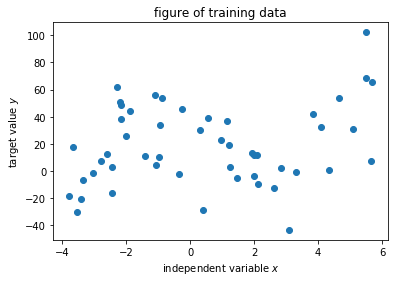

In [18]:
trainx=train.loc[:,'x']#the features
trainy=train.loc[:,'y']#the target
#a) Create a scatter plot of training data
%config lnlineBackend.figure_format = 'retina'
plt.scatter(trainx,trainy)
plt.title('figure of training data')
plt.xlabel('independent variable $x$')
plt.ylabel('target value $y$')

In [19]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
#b) Estimate the linear regression model
degree=1
poly=PolynomialFeatures(degree)
trainX=poly.fit_transform(trainx[:,np.newaxis])#[x^0, x^1]

model=linear_model.LinearRegression()#linear regression
model.fit(trainX,trainy)
print('parameters a_0: '+'{:.3f}'.format(model.intercept_))
print('parameters a_1: '+'{:.3f}'.format(model.coef_[1]))

from sklearn.metrics import mean_squared_error
print('Mean squared error of the training data using linear regression: %.4f'
      % mean_squared_error(trainy, model.predict(trainX)))#calculate mean square error

from sklearn.metrics import r2_score
r2=r2_score(trainy, model.predict(trainX))
print('R^2 of the training data using linear regression is {:.3f}'.format(r2))

parameters a_0: 17.205
parameters a_1: 2.591
Mean squared error of the training data using linear regression: 791.4167
R^2 of the training data using linear regression is 0.065


The linear regression expression is $y=17.205+2.591x$

In [20]:
#c) Multiple regression model
degreem=3
polym=PolynomialFeatures(degreem)
trainXm=polym.fit_transform(trainx[:,np.newaxis])#[x^0, x^1，x^2, x^3]

modelm=linear_model.LinearRegression()#multiple degree can be viewed as linear regression after transform the x
modelm.fit(trainXm,trainy)
print('parameters a_0: '+'{:.3f}'.format(modelm.intercept_))
for i in range(degreem):    
    print('parameters a_{:d}: '.format(i+1)+'{:.3f}'.format(modelm.coef_[i+1]))

print('Mean squared error of the training data using multiple regression model: %.4f'
      % mean_squared_error(trainy, modelm.predict(trainXm)))#calculate mean square error

r2m=r2_score(trainy, modelm.predict(trainXm))
print('R^2 of the training data using multiple regression model is {:.3f}'.format(r2m))

parameters a_0: 24.155
parameters a_1: -9.252
parameters a_2: -2.126
parameters a_3: 0.897
Mean squared error of the training data using multiple regression model: 510.8850
R^2 of the training data using multiple regression model is 0.396


The transforemed model is $y=24.155-9.252x-2.126x^2+0.897x^3 $

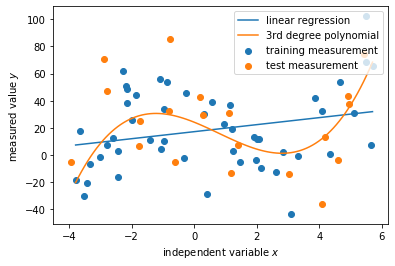

In [21]:
#d) plot the scatter and the two curves
testx=test.loc[:,'x']
testy=test.loc[:,'y']#test data
x_plot=np.linspace(np.min(trainx),np.max(trainx),100)# range of x
Xplot=poly.fit_transform(x_plot[:,np.newaxis])#test feature for linear regression
Xplotm=polym.fit_transform(x_plot[:,np.newaxis])#test feature for multiple degree regression
%config lnlineBackend.figure_format = 'retina'
plt.scatter(trainx,trainy,label='training measurement')
plt.scatter(testx,testy,label='test measurement')
plt.plot(x_plot,model.predict(Xplot),label='linear regression')
plt.plot(x_plot,modelm.predict(Xplotm),label='3rd degree polynomial')
plt.xlabel('independent variable $x$', size=10)
plt.ylabel('measured value $y$', size=10)
plt.legend(loc="upper right");

In [22]:
#e) test data
testx=test.loc[:,'x']
testy=test.loc[:,'y']
#linear regression
testX=poly.fit_transform(testx[:,np.newaxis])
print('Mean squared error of test data using linear regression: %.4f'
      % mean_squared_error(testy, model.predict(testX)))#calculate mean square error
r2=r2_score(testy, model.predict(testX))
print('R^2 of the test data using linear regression is {:.3f}'.format(r2))

#multiple regression model
testXm=polym.fit_transform(testx[:,np.newaxis])
print('Mean squared error of test data using multiple regression model: %.4f'
      % mean_squared_error(testy, modelm.predict(testXm)))#calculate mean square error
r2=r2_score(testy, modelm.predict(testXm))
print('R^2 of the test data using multiple regression model is {:.3f}'.format(r2))


Mean squared error of test data using linear regression: 1116.6632
R^2 of the test data using linear regression is -0.133
Mean squared error of test data using multiple regression model: 759.5031
R^2 of the test data using multiple regression model is 0.229


f ). The third degree polynomial perform better on both training data and test data and we can get the conclusion from comparing the mean sqaure error and $R^2$. The third degree polynomial has smaller mean square error and larger $R^2$ means it has closer total error and mean square error which is smaller than the one of linear regression. The third degree polynomial is better because it has more proper degree than the linear regression which is too simple and underfitting.

g ). The predictive capability of the model will be decreased. Since the model only fits the data points that follow certain rule, when the test data are ssignificantly different from the training data, which means the test data does not follow the rule of training data, the mean value of loss function will be very large which means the low predictive ability of the model.

In [23]:
#try some other model
import math
def newdata(trainx):
    train=np.array(trainx) 
    traindata=[]
    for i in train:
        traindata.append([i,i**2,math.sin(i)])
    return traindata
trainsin=newdata(trainx)
modelsin=linear_model.LinearRegression()#multiple degree can be viewed as linear regression after transform the x
modelsin.fit(trainsin,trainy)

print('parameters a_0: '+'{:.3f}'.format(modelsin.intercept_))
for i in range(3):    
    print('parameters a_{:d}: '.format(i+1)+'{:.3f}'.format(modelsin.coef_[i]))

print('Mean squared error of the training data using multiple regression model: %.4f'
      % mean_squared_error(trainy, modelsin.predict(trainsin)))#calculate mean square error

r2m=r2_score(trainy, modelsin.predict(trainsin))
print('R^2 of the training data using multiple regression model is {:.3f}'.format(r2m))

parameters a_0: 15.496
parameters a_1: 2.934
parameters a_2: -0.144
parameters a_3: -19.666
Mean squared error of the training data using multiple regression model: 610.1552
R^2 of the training data using multiple regression model is 0.279


The transformed model is $y=15.496+2.934x-0.144x^2-19.666sin(x)$

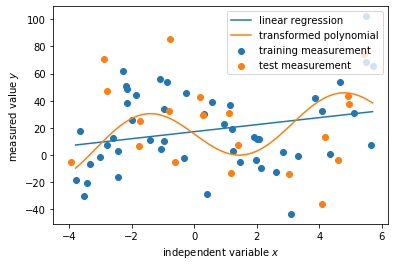

In [24]:
#plot the curve
%config lnlineBackend.figure_format = 'retina'
Xplotsin=newdata(x_plot)
plt.scatter(trainx,trainy,label='training measurement')
plt.scatter(testx,testy,label='test measurement')
plt.plot(x_plot,model.predict(Xplot),label='linear regression')
plt.plot(x_plot,modelsin.predict(Xplotsin),label='transformed polynomial')
plt.xlabel('independent variable $x$', size=10)
plt.ylabel('measured value $y$', size=10)
plt.legend(loc="upper right");

In [25]:
#multiple regression model
testXsin=newdata(testx)
print('Mean squared error of test data using multiple regression model: %.4f'
      % mean_squared_error(testy, modelsin.predict(testXsin)))#calculate mean square error
r2=r2_score(testy, modelsin.predict(testXsin))
print('R^2 of the test data using multiple regression model is {:.3f}'.format(r2))


Mean squared error of test data using multiple regression model: 1183.8502
R^2 of the test data using multiple regression model is -0.201


It seems that this model performs well in trainning data but perform bad in the test data. Because it is more complicate than the three degree multiple regession so it will have smaller error when perform on the training data.